In [1]:
# Downloads and saves ATNF page
import urllib.request
import time
import re
import pickle

url = "https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&Name=Name&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+csv+with+errors&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=48&table_bottom.y=22"
# main1-url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&JName=JName&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=77&table_bottom.y=17'
#url = 'https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&table_top.x=74&table_top.y=18&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+last+digit+error&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query'
#url = "https://www.atnf.csiro.au/research/pulsar/psrcat/proc_form.php?version=1.62&RaJ=RaJ&DecJ=DecJ&DM=DM&S400=S400&S1400=S1400&S2000=S2000&Assoc=Assoc&R_lum=R_lum&R_lum14=R_lum14&startUserDefined=true&c1_val=&c2_val=&c3_val=&c4_val=&sort_attr=jname&sort_order=asc&condition=&pulsar_names=&ephemeris=short&coords_unit=raj%2Fdecj&radius=&coords_1=&coords_2=&style=Long+with+errors&no_value=*&fsize=3&x_axis=&x_scale=linear&y_axis=&y_scale=linear&state=query&table_bottom.x=31&table_bottom.y=23"

with urllib.request.urlopen(url) as response:
   text = response.read().decode("utf-8")


with open('pulsars.page', 'wb') as pulsarDoc:
    pickle.dump(text, pulsarDoc)


In [76]:
from astropy.io import ascii
from astropy.table import Table
import pickle
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np
 
startpos = 31 # which line the content starts on
endpos = -5
 
with open('pulsars.page', 'rb') as pulsarDoc:
    pulsar_doc = pickle.load(pulsarDoc)
     
pulsars = pulsar_doc.split("\n")
 
columns=['N',
          'Name',
          'Name_REF',
          'RAJ',
          'RAJ_ERR',
          'RAJ_REF',
          'DECJ',
          'DECJ_ERR',
          'DECJ_REF',
          'DM',
          'DM_ERR',
          'DM_REF',
          'S400',
          'S400_ERR',
          'S400_REF',
          'S1400',
          'S1400_ERR',
          'S1400_REF',
          'S2000',
          'S2000_ERR',
          'S2000_REF',
          'ASSOC',
          'L400',
          'L1400',
          'extra']
 
pulsars = pulsars[startpos:len(pulsars)+endpos-1] #This trims it down to only the pulsars
 
num_cols=np.array([len(x.split(';')) for x in pulsars])
bad_rows=np.where(num_cols != num_cols[0])[0]
sum=0
for row in bad_rows:
    pulsars.pop(row-sum)
    sum+=1
 
data=ascii.read('\n'.join(pulsars),format='no_header',
                 delimiter=';',names=columns,
                 fill_values=[('*','-99')])


coords=SkyCoord(data['RAJ'],data['DECJ'],unit=('hour','deg'))
print(coords[0].dec.degree)
print(type(coords[0].dec.degree))
print(data[0])

with open('pulsars.table', 'wb') as pulsarDoc:
    pickle.dump(data, pulsarDoc)
with open('pulsars.skycoords', 'wb') as skycoords:
    pickle.dump(coords,skycoords)

62.26927777777777
<class 'numpy.float64'>
 N     Name    Name_REF     RAJ     RAJ_ERR RAJ_REF     DECJ    DECJ_ERR DECJ_REF   DM  DM_ERR DM_REF S400 S400_ERR S400_REF S1400 S1400_ERR S1400_REF S2000 S2000_ERR S2000_REF                              ASSOC                               L400 L1400 extra
--- ---------- -------- ----------- ------- ------- ----------- -------- -------- ----- ------ ------ ---- -------- -------- ----- --------- --------- ----- --------- --------- ---------------------------------------------------------------- ---- ----- -----
  1 J0002+6216   cwp+17 00:02:58.17    0.02  cwp+17 +62:16:09.4      0.1   cwp+17 218.6    0.6 wcp+18   --      0.0       -- 0.022       0.0      wu18    --       0.0        -- GRS:3FGL_J0002.6+6218[aaa+15],XRS:1XSPS_J000257.6+621609[wcp+18]   --  0.89      


In [23]:
#alternative, using psrqpy. 
#The different sources do not have the columns or amount of data, but both share the ones currently used
#program uses whichever of the cell above or this one was ran last. 
# psrqpy has less pulsars, so 
import psrqpy as ps
from astropy.table import Column
import numpy


data = ps.QueryATNF().catalogue_table
data.add_column(Column(np.arange(len(data)),name="N"), index=0)
coords=SkyCoord(data['RAJ'],data['DECJ'],unit=('hour','deg'))

print(coords[0])
with open('pulsars.table', 'wb') as pulsarDoc:
    pickle.dump(data, pulsarDoc)

with open('pulsars.skycoords', 'wb') as skycoords:
    pickle.dump(coords,skycoords)

<SkyCoord (ICRS): (ra, dec) in deg
    (0.742375, 62.26927778)>


In [3]:
#Test cell for tableGet
import tableGet as tg
#V[num] is the version number of the matarial source. Creates new table with no delations of old ones
#hasDM - it has a measured DM
#posErrorASec[num] has an error in position less than a specific number of arcseconds
#posRange[num1,num2,num3,num4] Declination and RA ranges (low-high)

table1 = tg.tableGet(["V[test1]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,23:59:0.0,-90:0:0.0,90:0:0.0]"])
table2 = tg.tableGet(["V[test1]", "posRange[0:0:0.0,23:59:0.0,-90:0:0.0,90:0:0.0]"])

print(len(table1))
print(len(table2))
print(len(table2)-len(table1))
#print(table[-1])

# ~1000 pulsars are cut when pos error is 1 arcsec. This leaves ~1700 good ones.
# An additional 100 pulsars are ommited because they do not have a DM on file

['0:0:0.0', '23:59:0.0', '-90:0:0.0', '90:0:0.0']
1702
2800
1098


In [5]:
# goes through and finds all objects in the a subset of the tables from the mosiacs, putting them into a single list
# There are "component", "island", and a normal category of table.
# The normal one seems to outline all objects so I focus on that one
import os
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import re
import time

path = 'tables/racs_catv'
file_names = os.listdir(path)
file_infos = []

for i in file_names: 
    if 'selavy.txt' in i:
        file = open(path + "/" + i, "r")
        file_info = file.read().split("\n")
        mos_filename = file_info[4][67:]
        items = file_info[47:]
        """
        content of each item:
        ObjID Name X Y Z RA DEC RA DEC VEL MAJ MIN PA w_RA w_DEC w_50 w_20 w_VEL F_int F_tot F_peak 
        # X1 X2 Y1 Y2 Z1 Z2 Nvoxel Nchan Nspatpix Flag X_av Y_av Z_av X_cent Y_cent Z_cent X_peak Y_peak Z_peak
        # [deg] [deg] [arcsec] [arcsec] [deg] [arcmin] [arcmin] [Jy]  [Jy/beam] [Jy/beam] 
        """
        for ii in range(len(items)):
            items[ii] = re.split(r' {1,}', items[ii].strip())
            
            if len(items[ii]) != 1:
                coord = SkyCoord(items[ii][5], items[ii][6], unit=(u.hourangle, u.deg))
                items[ii].append(coord)
                items[ii].append(mos_filename)
                file_infos.append(items[ii])



#print(len(real_file_info))
print(len(file_infos))
with open('table_info', 'wb') as table_infos:
    pickle.dump(file_infos, table_infos)

132734


In [25]:
# Turns objects from mosiacs into list of sky coord from astropy and checks them against pulsars
from astropy.coordinates import match_coordinates_sky
import tableGet as tg
import pickle
from astropy.coordinates import SkyCoord
import astropy.units as u

with open('table_info', 'rb') as objectDoc:
    skyObjects = pickle.load(objectDoc)
    
with open('pulsars.skycoords', 'rb') as objectDoc:
    pulsarCoords = pickle.load(objectDoc)
    
        
#print(len(coordList))



catalog = SkyCoord(ra = (i[5] for i in skyObjects), dec = (i[6] for i in skyObjects), unit=(u.hourangle, u.deg))
pulsars = tg.tableGet(["V[test33]","hasDM", "posErrorASec[01]", "posRange[0:0:0.0,23:59:59.0,-90:0:0.0,90:0:0.0]"])
matches = []
for i in range(len(pulsars)):
    match = pulsarCoords[pulsars["N"][i]-1].match_to_catalog_sky(catalog)
    matches.append([match, pulsars[i], skyObjects[match[0]]])

print(len(matches))
print(len(pulsars))

1702
1702


In [28]:
# Crops the matches
import astropy.units as u
#print(matches[0][2])
close_matches = []
for i in matches:
    if (i[0][1] < 5 * u.arcsec)[0]:
        close_matches.append(i)
print(len(close_matches))
print(close_matches[0][2])

36
['43', 'B0536-7543', '3681.6', '13791.1', '0.0', '05:36:31.0', '-75:43:53', '84.129167', '-75.731534', '0.000', '15.53', '6.84', '76.90', '0.271', '0.0690', '0.000', '0.000', '0.000', '0.00039', '0.0124', '0.00104', '3679', '3684', '13790', '13792', '0', '0', '15', '1', '15', '-', '3681.6', '13791.1', '0.0', '3681.613791.1', '0.0', '3682', '13791', '0', <SkyCoord (ICRS): (ra, dec) in deg
    (84.12916667, -75.73138889)>, 'nRACS_test4_1.05_0445-80A-selavy.txt']


In [12]:
# Creates region file
import pickle

region_info = """# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5"""

for i in close_matches:
    region_info += "\n" + "circle(" + str(i[1][3]) + "," + str(i[1][6]) + "," + str(6) +'")'
print(region_info)
file = open("regions","w") 
file.write(region_info)
file.close() 


# Region file format: DS9 version 4.1
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1
fk5
circle(07:19:07.380,-25:45:00.23,6")
circle(08:20:59.932,-38:26:42.88,6")
circle(08:38:18.801,-26:21:29.55,6")
circle(12:44:11.48,-50:53:20.6,6")
circle(13:17:46.29,-57:59:30.5,6")
circle(13:26:32.44,-64:08:43.8,6")
circle(13:39:56.5886,-47:12:05.52,6")
circle(17:52:35.42,23:59:48.2,6")
circle(18:01:00.016,-24:51:27.5,6")
circle(19:32:46.307,+15:00:22.2,6")
circle(20:18:53.196,+34:31:00.51,6")


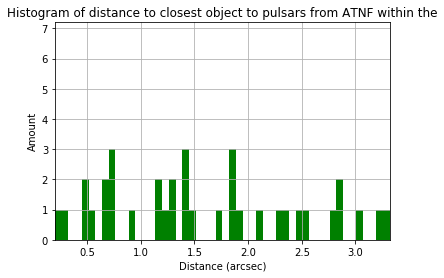

In [29]:
#Histogram of how close matches are overall
import astropy.units as u

import numpy as np
import matplotlib.pyplot as plt

distances = []
for i in close_matches:
    distances.append(i[0][1][0].decompose() * (206265/u.rad))
    
distances.sort()

plt.hist(distances, 50, facecolor='g')
plt.xlabel('Distance (arcsec)')
plt.ylabel('Amount')
plt.title('Histogram of distance to closest object to pulsars from ATNF within the')
plt.xlim(distances[0], distances[-1])
plt.ylim(0, len(distances)/5)
plt.grid(True)
plt.show()